In [1]:
from datasets import load_dataset

In [2]:
emotions = load_dataset("emotion")
emotions

/home/david/Repos/nlp-processing-with-transformers/.venv/lib/python3.12/site-packages/datasets/load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
train_dataset = emotions["train"]
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [4]:
len(train_dataset)

16000

In [5]:
train_dataset[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [6]:
train_dataset.column_names

['text', 'label']

In [7]:
train_dataset[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [8]:
train_dataset["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [9]:
import pandas as pd

In [10]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [12]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [13]:
import matplotlib.pyplot as plt

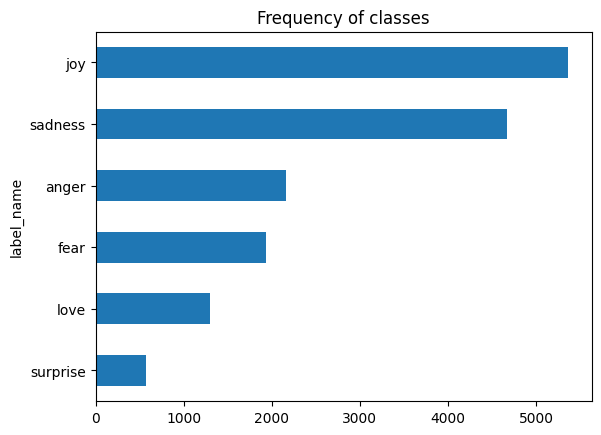

In [14]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
plt.show()

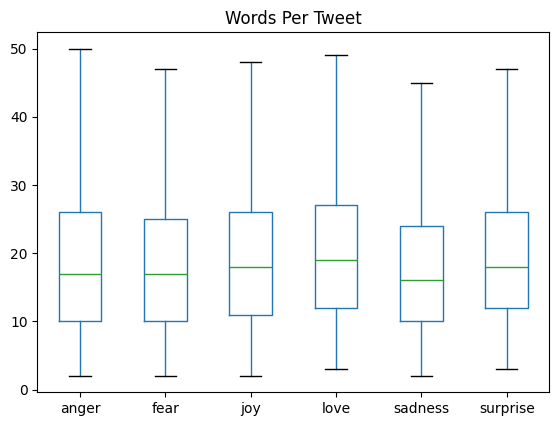

In [15]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [16]:
emotions.reset_format()

## Character Tokenization


In [17]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [ ]:
print(f"Number of tokens: {len(tokenized_text)}")

In [18]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [19]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [20]:
import torch
import torch.nn.functional as F

In [ ]:
print(f"Length of token2idx: {len(token2idx)}")

In [21]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [22]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## Word Tokenization


In [23]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### Subword Tokenization


In [24]:
from transformers import AutoTokenizer

In [25]:
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

/home/david/Repos/nlp-processing-with-transformers/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [26]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The attention mask is useful because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input.


In [27]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text["input_ids"])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [28]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


The `AutoTokenizer` class also has several attributes that provide information about the tokenizer. For example, we inspect the vocabulary size.


In [29]:
tokenizer.vocab_size

30522

and the corresponding model's maximum context size:


In [30]:
tokenizer.model_max_length

512

Another interesting attribute to know about is the names of the fields that the model expects in its forward pass:


In [31]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## Tokenizing the whole dataset


In [32]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [33]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Once we've defined a processing function, we can apply it across all the splits in the corpus in a single line of code:


In [34]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

By default, the `map` method operates individually on every example in the corpus, so setting `batched=True` will encode the tweets in batches. Because we've set `batch_size=None`, our `tokenize()` function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally, and we can see that this operation has added new `input_ids` and `attention_mask` column to the dataset:


In [35]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


## Transformers as Feature Extractors


In [36]:
from transformers import AutoModel

In [37]:
model_checkpoint = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

The model will run on the GPU if we have one. If not, the model will run on the CPU, which can be considerably slower.


In [38]:
model = AutoModel.from_pretrained(model_checkpoint).to(device)

### Extracting the last hidden states


In [39]:
example_text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
inputs_items = inputs.items()
print(f"Input items: {inputs_items}\n\n")
print(f"Input tensor: {inputs['input_ids']}\n\n")
inputs = {k: v.to(device) for k, v in inputs_items}
print(f"Inputs: {inputs}")
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

Input items: dict_items([('input_ids', tensor([[  101, 19204,  6026,  3793,  2003,  1037,  4563,  4708,  1997, 17953,
          2361,  1012,   102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))])
Input tensor: tensor([[  101, 19204,  6026,  3793,  2003,  1037,  4563,  4708,  1997, 17953,
          2361,  1012,   102]])
Inputs: {'input_ids': tensor([[  101, 19204,  6026,  3793,  2003,  1037,  4563,  4708,  1997, 17953,
          2361,  1012,   102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
BaseModelOutput(last_hidden_state=tensor([[[-0.5274, -0.2094, -0.3702,  ..., -0.2226, -0.2209,  0.6306],
         [-0.8933,  0.1909, -0.5291,  ..., -0.3937, -0.1585,  0.3817],
         [-0.5556,  0.1427, -0.5014,  ..., -0.3935, -0.3470,  0.6484],
         ...,
         [-0.4909, -0.3005, -0.0368,  ..., -0.0892, -0.6761,  0.3377],
         [ 0.5523, -0.0374, -0.6801,  ...,  0.2615, -0.7397, -0.2420],
         [ 

In our example, the model output is an instance of `BaseModelOutput`, and we can simply access its attributes by name. The current model returns only one attribute, which is the last hidden state, so let's examine its shape:


In [40]:
outputs.last_hidden_state.size()

torch.Size([1, 13, 768])

Note that the shape is `[batch_size, n_tokens, hidden_dim]`


In [41]:
outputs.last_hidden_state

tensor([[[-0.5274, -0.2094, -0.3702,  ..., -0.2226, -0.2209,  0.6306],
         [-0.8933,  0.1909, -0.5291,  ..., -0.3937, -0.1585,  0.3817],
         [-0.5556,  0.1427, -0.5014,  ..., -0.3935, -0.3470,  0.6484],
         ...,
         [-0.4909, -0.3005, -0.0368,  ..., -0.0892, -0.6761,  0.3377],
         [ 0.5523, -0.0374, -0.6801,  ...,  0.2615, -0.7397, -0.2420],
         [ 0.4775,  0.1837, -0.4203,  ...,  0.2080, -0.9114, -0.0827]]],
       device='cuda:0')

For classification tasks, it is common practice to just use the hidden state associated with the [CLS] token as the input feature. Since this token appears at the start of each sequence, we can extract it by simply indexing into `outputs.last_hidden_state` as follows:


In [42]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [43]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU/CPU
    inputs = {
        k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names
    }
    with torch.no_grad():
        # Forward pass through the model
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

Since our model expects tensors as inputs, the next thing to do is convert the `input_ids` and `attention_mask` columns to the "torch" format as follows:


In [44]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [45]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [46]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

## Creating a feature matrix


In [47]:
import numpy as np

In [48]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions["train"]["label"])
y_valid = np.array(emotions["validation"]["label"])
X_train.shape, y_train.shape

((16000, 768), (16000,))

## Visualizing the training set


In [49]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [50]:
X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_embedding = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_embedding["label"] = y_train
df_embedding.head()

,X,Y,label
0,4.407629,6.931200,0
1,-2.934486,6.419973,0
2,5.196961,3.525816,3
3,-2.526166,4.673879,2
4,-3.436970,4.803956,3


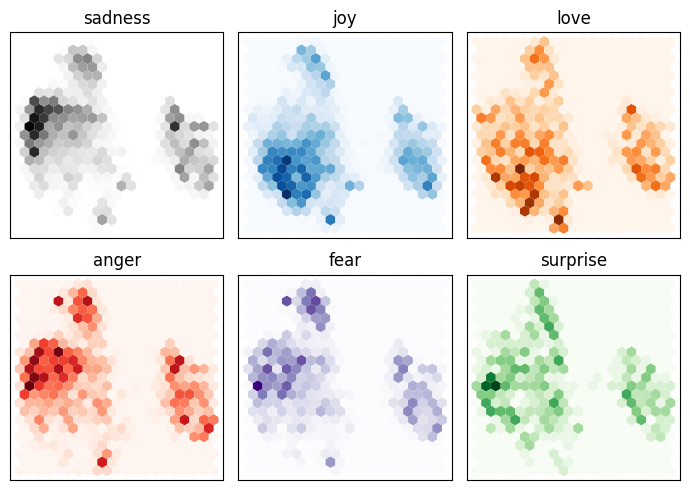

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_embedding_sub = df_embedding.query(f"label == {i}")
    axes[i].hexbin(
        df_embedding_sub["X"],
        df_embedding_sub["Y"],
        cmap=cmap,
        gridsize=20,
        linewidths=(0,),
    )
    axes[i].set_title(label)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()

### Training a simple classifier


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [54]:
from sklearn.dummy import DummyClassifier

In [55]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [57]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

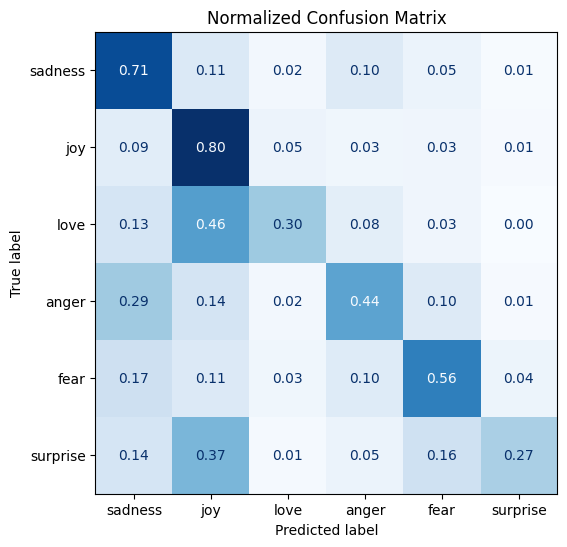

In [58]:
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Fine-Tuning Transformers


In [59]:
from transformers import AutoModelForSequenceClassification

In [60]:
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=num_labels
).to(device)

/home/david/Repos/nlp-processing-with-transformers/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Defining the performance metrics


In [61]:
from sklearn.metrics import accuracy_score, f1_score

In [62]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}

## Tranining the model


In [63]:
from huggingface_hub import interpreter_login

In [64]:
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global 

In [65]:
from transformers import Trainer, TrainingArguments

In [66]:
batch_size = 64
logging_steps = len(emotions["train"]) // batch_size
model_name = f"{model_checkpoint}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True,
    log_level="error",
)

In [67]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer,
)

In [68]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.775200,0.293085,0.914500,0.913938
2,0.238400,0.196056,0.929000,0.928788


TrainOutput(global_step=500, training_loss=0.5068296737670899, metrics={'train_runtime': 1542.3345, 'train_samples_per_second': 20.748, 'train_steps_per_second': 0.324, 'total_flos': 720342861696000.0, 'train_loss': 0.5068296737670899, 'epoch': 2.0})

In [69]:
preds_output = trainer.predict(emotions_encoded["validation"])
preds_output.metrics

{'test_loss': 0.1960555464029312,
 'test_accuracy': 0.929,
 'test_f1': 0.9287880205905158,
 'test_runtime': 14.6671,
 'test_samples_per_second': 136.36,
 'test_steps_per_second': 2.182}

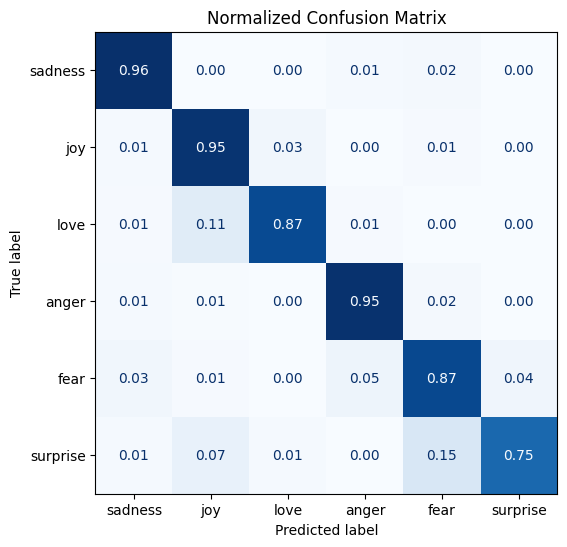

In [70]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

## Error analysis


In [ ]:
from torch.nn.functional import cross_entropy


def forward_pass_with_label(batch):
    inputs = {
        k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names
    }
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")
    return {"loss": loss.cpu().numpy(), "pred_label": pred_label.cpu().numpy()}

In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)

In [ ]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "pred_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

Now we can sort `emotions_encoded` by the losses in either ascending or descending order. The goal is to detect one of the following:

- Wrong labels
- Quirks of the dataset
